<a href="https://colab.research.google.com/github/Balaji-0-5/N-Body-Simulation/blob/main/Tools_for_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

Tools for the simulation

In [ ]:
import math

G = 6.67408e-11
    
units = {"length": 'm', "time": 's',  "mass": 'kg'}



G_SI = 6.67408e-11
times_SI = {'s':1.,
    'hr':3600.,
    'day': 86400.,
    'days': 86400.,
    'd': 86400.,
    'yr':31557600., # Julian year (exact)
    'year':31557600., 
    'years':31557600., 
    'yrs':31557600., 
    'jyr':31557600.,
    'sidereal_yr':31558149.7635,
    'yr2pi':math.sqrt(149597870700.**3/1.3271244004193938e20), # chosen to make G=1
    'kyr':31557600.*1.e3,
    'myr':31557600.*1.e6,
    'gyr':31557600.*1.e9}
lengths_SI =  {'m':1.,
    'cm':0.01,
    'km':1000.,
    'au':149597870700.,
    'aus':149597870700.,
    'pc':3.085677581e16,
    'parsec':3.085677581e16,
    'kpc' : 3.085677581e19
    }

    
    
masses_SI = {'kg':1.,
    'g':1.0e-3,
    'gram':1.0e-3,
    'msun':1.3271244004193938E+11/G_SI*10**9,
    'solarmass':1.3271244004193938E+11/G_SI*10**9,
    'sunmass':1.3271244004193938E+11/G_SI*10**9,
    'msolar':1.3271244004193938E+11/G_SI*10**9,
    'mmercury':2.2031780000000021E+04/G_SI*10**9,
    'mvenus':3.2485859200000006E+05/G_SI*10**9,
    'mearth':3.9860043543609598E+05/G_SI*10**9,
    'mmars':4.282837362069909E+04/G_SI*10**9,
    'mjupiter':1.266865349218008E+08/G_SI*10**9,
    'msaturn':3.793120749865224E+07/G_SI*10**9,
    'muranus':5.793951322279009E+06/G_SI*10**9,
    'mneptune':6.835099502439672E+06/G_SI*10**9,
    'mpluto':8.696138177608748E+02/G_SI*10**9,
    'massist':4.48485856027459e+14/G_SI*10**9, # Sun has mass 0.00029591220828412 in these units. Used to keep G=1 while length=AU and time=day
            }

def update_units(new_l,new_t,new_m):

    units = {"length": new_l,"time" : new_t,"mass" : new_l}
    G = convert_G((new_l,new_t,new_m))

def units_convert_particle(pos,mom,mass, new_l, new_t, new_m):
    mass = convert_mass(mass, new_m)
    x,y,z =pos
    x = convert_length(x,  new_l) 
    y = convert_length(y, new_l)
    z = convert_length(z,  new_l)
    pos = np.array((x,y,z))
    px,py,pz = mom
    px = convert_mom(px, new_m, new_l, new_t)
    py = convert_mom(py, new_m, new_l, new_t)
    px = convert_mom(pz, new_m, new_l, new_t)
    mom = np.array((px,py,pz))
    update_units(new_l,new_t,new_m)
    return pos, mom, mass

def convert_mass(mass, new_m):
    if new_m == units['mass']:
        return mass
    else:
        return mass* masses_SI[ units['mass'] ] /masses_SI[new_m]

def convert_length(length, new_l):
    if new_l == units['length']:
        return length
    else:
        return length* lengths_SI[units['length']] /lengths_SI[new_l]

def convert_mom(mom, new_m, new_l, new_t):
    in_SI=mom*(masses_SI[units['mass']] * lengths_SI[units['length']]) / times_SI[ units['time'] ]
    return in_SI*times_SI[new_t]/(lengths_SI[new_l]*masses_SI[new_m])


def convert_G(newunits):
    new_l, new_t, new_m = newunits
    return G*masses_SI[new_m]*times_SI[new_t]**2/lengths_SI[new_l]**3


def calculate_energy(positions , momenta, masses):
    """
    Calculates the total energy of a system of particles given their positions,
    momenta, and masses, using the formula E = K + U, where K is the kinetic energy
    and U is the potential energy.
    
    Parameters:
        - positions (ndarray of shape (3, n)): The positions of the particles.
        - momenta (ndarray of shape (3, n)): The momenta of the particles.
        - masses (ndarray of shape (n,)): The masses of the particles.
    
    Returns:
        - energy (float): The total energy of the system.
    """
    # Calculate kinetic energy
    speed_squared = np.sum(momenta**2, axis=0) / (masses * 2)
    K = np.sum(masses * speed_squared)
    
    # Calculate potential energy
    U = 0.0
    n = len(masses)
    for i in range(n):
        for j in range(i+1, n):
            r = np.linalg.norm(positions[:,i] - positions[:,j])
            U -= G * masses[i] * masses[j] / r
    
    # Calculate total energy
    energy = K + U
    
    return energy


In [ ]:
def load_sim_data(file_path):
    with open(file_path) as f:
        data = json.load(f)
        sim_data = np.array(data['sim_data'])
        return sim_data

Define the number of files

In [ ]:
no_of_files = 30

In [ ]:
sim_data_list = []
for i in range(1, no_of_files+1):
    if i<10:
        file_name = f"Run_0000{i}.json"
    else:
        file_name = f"Run_000{i}.json"
    sim_data = load_sim_data(file_name).reshape((3,20000,50))
    sim_data_list.append(sim_data)

In [ ]:
sim_data = np.append(sim_data_list[0],sim_data_list[1],axis=2)

In [ ]:
for i in range(2,no_of_files):
    sim_data = np.append(sim_data,sim_data_list[i],axis =2)

Save the data from all runs into a single npy file for analysis.

In [ ]:
np.save("sim_data.npy",sim_data)

Load the npy file

In [ ]:
sim_data = np.load("sim_data.npy")

Create the animation video

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

In [ ]:



# Generate random particle data
num_particles = 20000
num_frames = 1500 #Note that the number is  equal to the total time steps of integration
# Calculate particle density
density = np.zeros(num_particles)
for i in range(num_frames):
    density += np.sqrt(np.sum(np.square(sim_data[:, :, i]), axis=0))

# Normalize density values to range [0, 1]
density_norm = (density - np.min(density)) / (np.max(density) - np.min(density))

# Initialize the figure and the 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sm = ScalarMappable(cmap=plt.cm.nipy_spectral_r)
sm.set_array(density_norm*15)
cbar = plt.colorbar(sm)

# Define the update function for the animation
def update(frame):
    ax.clear()
    ax.set_xlim3d([-5, 5])
    ax.set_ylim3d([-5, 5])
    ax.set_zlim3d([-5, 5])
    ax.set_xlabel("(Kpc)")
    ax.set_ylabel("(Kpc)")
    ax.set_zlabel("(Kpc)")
    # Set color of particles based on density
    colors = plt.cm.nipy_spectral_r(density_norm*15)
    
    
    ax.scatter(sim_data[0, :, frame], sim_data[1, :, frame], sim_data[2, :, frame], marker='.', c=colors)
    ax.set_title(f" N-body Simulation \n Frame {frame}")
    #ax.view_init(elev=60, azim=30)
   

    return ax

    
# Create the animation object and save it as a video file
anim = FuncAnimation(fig, update, frames=num_frames)
anim.save('simulation_videoHD.mp4', writer='ffmpeg', dpi=500) #change dpi to adjust video clarity


Display a particluar frame from the simulation

In [ ]:
frame = 1499
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.clear()
sm = ScalarMappable(cmap=plt.cm.nipy_spectral_r)
sm.set_array(density_norm*10)
cbar = plt.colorbar(sm)
ax.set_xlim3d([-5, 5])
ax.set_ylim3d([-5, 5])
ax.set_zlim3d([-5, 5])

# Set color of particles based on density
colors = plt.cm.nipy_spectral_r(density_norm*15)


ax.scatter(sim_data[0, :, frame], sim_data[1, :, frame], sim_data[2, :, frame], marker='.', c=colors)
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

# Set axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

ax.set_title(f"Frame {frame}")
plt.savefig("final.png")
plt.show()

Analysing the position and momentum data of the final state.

Upload the Run and sim parameters files to session storage before running the analysis.

In [4]:

with open("Run_00030.json") as f:
    data = json.load(f)
    pos_data = np.array(data['pos_data'])
    mom_data = np.array(data['mom_data'])
with open("sim_parameters.json") as f:
    data = json.load(f)
    mass_data = np.array(data['Masses'])

mass_data = np.array(mass_data)
pos_data = pos_data.reshape(3,20000)
mom_data = mom_data.reshape(3,20000)
vel_data = mom_data/mass_data

Radial distances and velocities about the Origin

In [5]:
frad_dist = np.sqrt(pos_data[0,:]**2+pos_data[1,:]**2+pos_data[2,:]**2)
frad_vel = np.sqrt(vel_data[0,:]**2+vel_data[1,:]**2+vel_data[2,:]**2)

Transforming the coordiantes about the com

In [6]:
com_pos = np.sum(pos_data.transpose() * mass_data[:, np.newaxis], axis=0) / np.sum(mass_data)
com_vel = np.sum(vel_data.transpose() * mass_data[:, np.newaxis], axis=0) / np.sum(mass_data)

rel_pos = pos_data.transpose() - com_pos
rel_vel = vel_data.transpose() - com_vel

rel_pos = rel_pos.transpose()
rel_vel = rel_vel.transpose()

Radial distances and velocities about the Center of mass

In [7]:
rad_dist = np.sqrt(rel_pos[0,:]**2 + rel_pos[1,:]**2 + rel_pos[2,:]**2)
rad_vel = np.sqrt(rel_vel[0,:]**2 + rel_vel[1,:]**2 + rel_vel[2,:]**2)

Radial distance of COM from origin

In [8]:
rad_com_dist = np.sqrt(com_pos[0]**2+com_pos[1]**2+com_pos[2]**2)

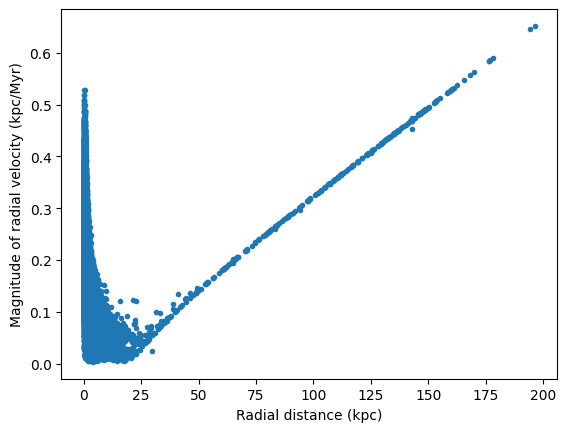

In [13]:
#plottig the data
plt.scatter(rad_dist,rad_vel,marker=".")
plt.xlabel("Radial distance (kpc)")
plt.ylabel("Magnitude of radial velocity (kpc/Myr)")
#plt.xlim(0,10)
#plt.savefig("distvsvelplotfinallim10.png") #Uncomment this line to save the figure
plt.show()

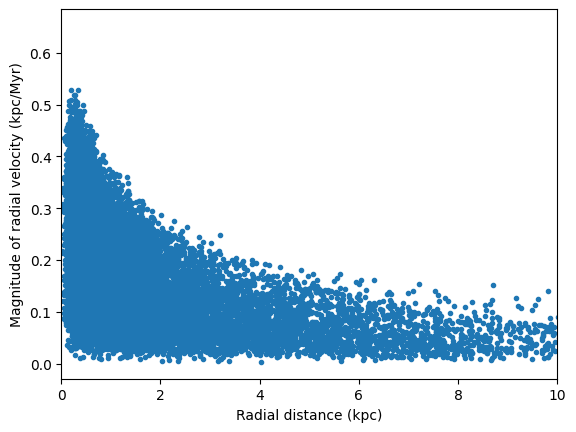

In [11]:
#plottig the data
plt.scatter(rad_dist,rad_vel,marker=".")
plt.xlabel("Radial distance (kpc)")
plt.ylabel("Magnitude of radial velocity (kpc/Myr)")
plt.xlim(0,10)
#plt.savefig("distvsvelplotfinallim10.png") #Uncomment this line to save the figure
plt.show()

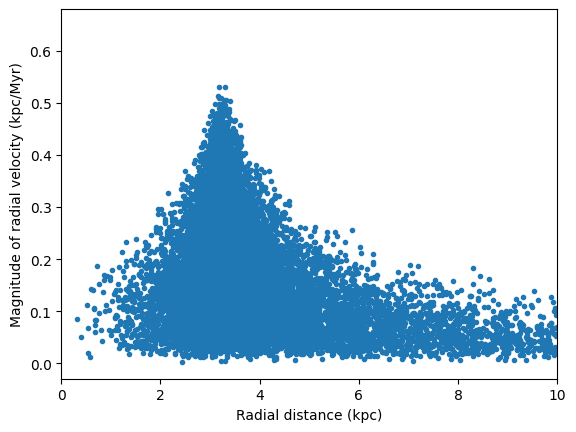

In [12]:
#plottig the data
plt.scatter(frad_dist,frad_vel,marker=".")
plt.xlabel("Radial distance (kpc)")
plt.ylabel("Magnitude of radial velocity (kpc/Myr)")
plt.xlim(0,10)
#plt.savefig("distvsvelplotfinallim10.png") #Uncomment this line to save the figure
plt.show()

Distribution of particles as histogram

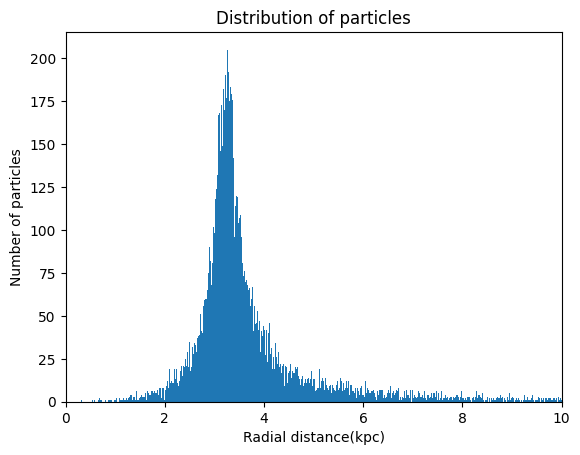

In [32]:
# Plot histogram
plt.hist(frad_dist, bins=1000)
plt.xlabel('Radial distance(kpc)')
plt.ylabel('Number of particles')
plt.xlim(0,10)
plt.title('Distribution of particles')
#plt.savefig("finalparticledistribution.png")
plt.show()

Analysing the data from the inital conditions


In [23]:
with open("Run_00001.json") as f:
    data = json.load(f)
    ipos_data = np.array(data['pos_data']).reshape(3,20000)
    imom_data = np.array(data['mom_data']).reshape(3,20000)

In [24]:
ivel_data = imom_data/mass_data

In [25]:
irad_dist = np.sqrt(ipos_data[0,:]**2+ipos_data[1,:]**2+ipos_data[2,:]**2)
irad_vel = np.sqrt(ivel_data[0,:]**2+ivel_data[1,:]**2+ivel_data[2,:]**2)

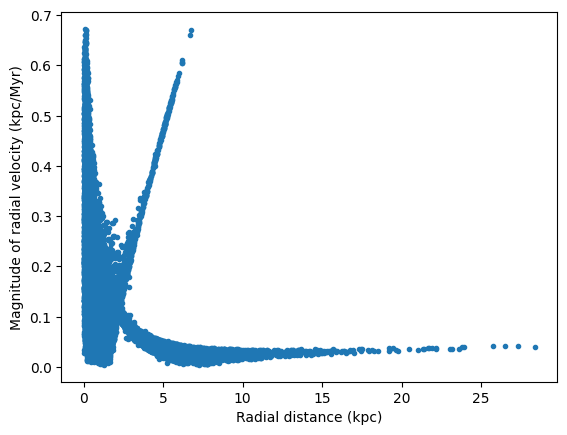

In [26]:
plt.scatter(irad_dist,irad_vel,marker=".")
plt.xlabel("Radial distance (kpc)")
plt.ylabel("Magnitude of radial velocity (kpc/Myr)")
#plt.xlim(0,10)
#plt.savefig("initaldistvsvelfull.png")
plt.show()

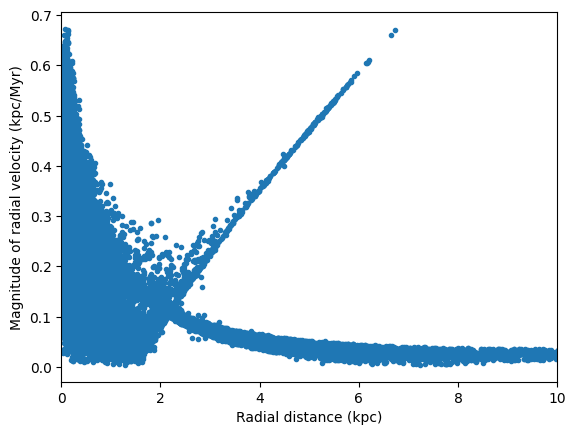

In [28]:
plt.scatter(irad_dist,irad_vel,marker=".")
plt.xlabel("Radial distance (kpc)")
plt.ylabel("Magnitude of radial velocity (kpc/Myr)")
plt.xlim(0,10)
#plt.savefig("initaldistvsvelfull.png")
plt.show()

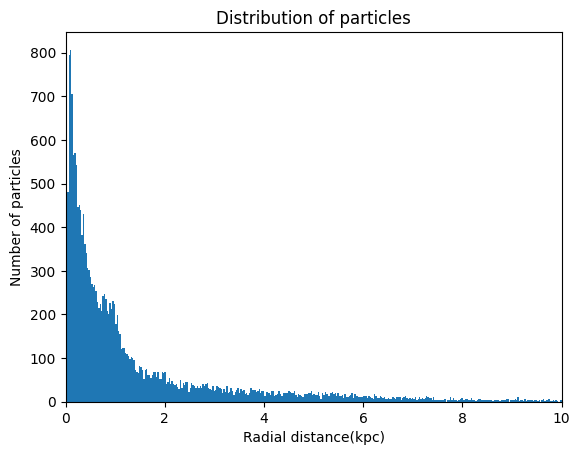

In [30]:
# Plot histogram
plt.hist(irad_dist, bins=1000)
plt.xlabel('Radial distance(kpc)')
plt.ylabel('Number of particles')
plt.xlim(0,10)
plt.title('Distribution of particles')
#plt.savefig("finalparticledistribution.png")
plt.show()